In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
from google.colab import files
file=files.upload()

Saving Student_Performance.csv to Student_Performance.csv


In [ ]:
df=pd.read_csv('Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23
9996,7,64,Yes,8,5,58
9997,6,83,Yes,8,5,74
9998,9,97,Yes,7,0,95


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [ ]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [ ]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23
9996,7,64,Yes,8,5,58
9997,6,83,Yes,8,5,74
9998,9,97,Yes,7,0,95
9999,7,74,No,8,1,64


In [ ]:
df.shape # rows, cols

(10000, 6)

In [ ]:
# statistical data
df.describe() # numeric data

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


In [ ]:
# label encoding - categorical data - string - object
df['Extracurricular Activities']=df['Extracurricular Activities'].map({"Yes":1,"No":0})
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66
...,...,...,...,...,...,...
9995,1,49,1,4,2,23
9996,7,64,1,8,5,58
9997,6,83,1,8,5,74
9998,9,97,1,7,0,95


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     10000 non-null  int64
 1   Previous Scores                   10000 non-null  int64
 2   Extracurricular Activities        10000 non-null  int64
 3   Sleep Hours                       10000 non-null  int64
 4   Sample Question Papers Practiced  10000 non-null  int64
 5   Performance Index                 10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


In [ ]:
df.dtypes

,0
Hours Studied,int64
Previous Scores,int64
Extracurricular Activities,int64
Sleep Hours,int64
Sample Question Papers Practiced,int64
Performance Index,int64


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [ ]:
display(df.drop_duplicates())

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66
...,...,...,...,...,...,...
9995,1,49,1,4,2,23
9996,7,64,1,8,5,58
9997,6,83,1,8,5,74
9998,9,97,1,7,0,95


In [ ]:
# relationship between data
# only works with numeric data
# correlation
corr=df.corr()
corr

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


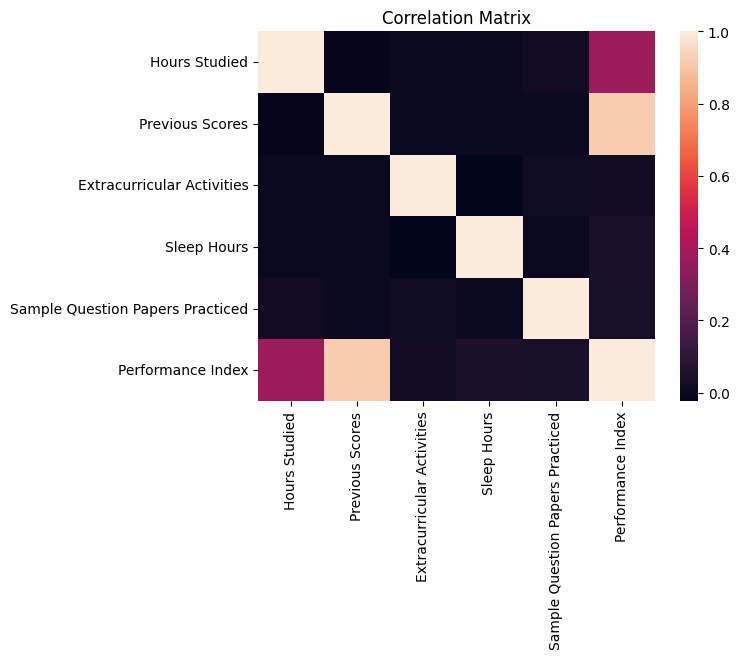

In [ ]:
# visualization
sns.heatmap(corr)
plt.title('Correlation Matrix')
plt.show()

<Axes: >

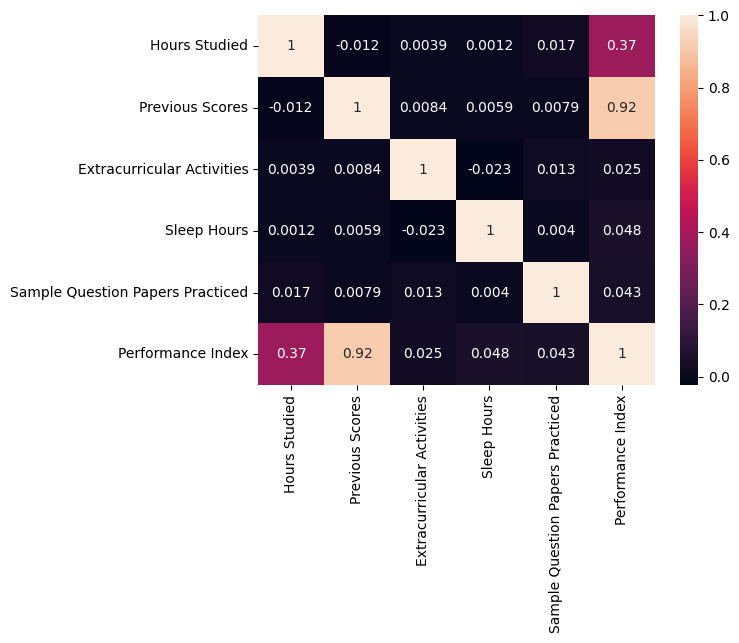

In [ ]:
sns.heatmap(corr,annot=True)

<Axes: >

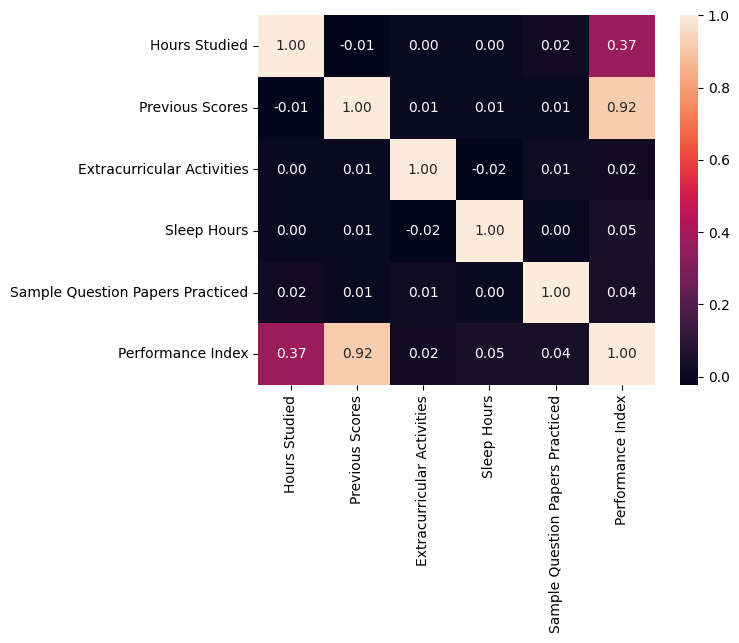

In [ ]:
sns.heatmap(corr,annot=True,fmt=".2f")

In [ ]:
df.drop_duplicates(subset=['Hours Studied','Previous Scores'])
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66
...,...,...,...,...,...,...
9995,1,49,1,4,2,23
9996,7,64,1,8,5,58
9997,6,83,1,8,5,74
9998,9,97,1,7,0,95


In [ ]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [ ]:
# feature Engineering - column
# inplace - True
# axis =1 column, 0 rows
df.drop(columns=['Sample Question Papers Practiced'],axis=1,inplace=True)
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Performance Index
0,7,99,1,9,91
1,4,82,0,4,65
2,8,51,1,7,45
3,5,52,1,5,36
4,7,75,0,8,66
...,...,...,...,...,...
9995,1,49,1,4,23
9996,7,64,1,8,58
9997,6,83,1,8,74
9998,9,97,1,7,95


In [ ]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Performance Index'],
      dtype='object')

In [ ]:
# taking required features
x=df[['Hours Studied','Previous Scores']]
x

,Hours Studied,Previous Scores
0,7,99
1,4,82
2,8,51
3,5,52
4,7,75
...,...,...
9995,1,49
9996,7,64
9997,6,83
9998,9,97


In [ ]:
y=df['Performance Index']
y

,Performance Index
0,91
1,65
2,45
3,36
4,66
...,...
9995,23
9996,58
9997,74
9998,95


In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
xtrain

,Hours Studied,Previous Scores
9254,5,49
1561,2,48
1670,2,81
6087,2,46
6669,8,47
...,...,...
5734,8,50
5191,4,68
5390,9,48
860,1,47


In [ ]:
xtest

,Hours Studied,Previous Scores
6252,5,69
4684,2,46
1731,7,56
4742,6,42
4521,7,53
...,...,...
6412,2,70
8285,4,79
7853,2,40
1095,3,83


In [ ]:
ytrain

,Performance Index
9254,36
1561,25
1670,59
6087,22
6669,40
...,...
5734,48
5191,51
5390,44
860,20


In [ ]:
ytest

,Performance Index
6252,51
4684,20
1731,46
4742,28
4521,41
...,...
6412,45
8285,66
7853,16
1095,65


In [ ]:
xtrain.shape

(8000, 2)

In [ ]:
# standardization mean 0 std.dev
# -1 to +1
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [ ]:
xtrain

array([[ 0.00645547, -1.18384439],
       [-1.14974745, -1.24150571],
       [-1.14974745,  0.66131759],
       ...,
       [ 1.54805935, -1.24150571],
       [-1.53514842, -1.29916702],
       [-1.14974745, -1.35682833]])

In [ ]:
xtest

array([[ 0.00645547, -0.03061816],
       [-1.14974745, -1.35682833],
       [ 0.77725741, -0.78021521],
       ...,
       [-1.14974745, -1.7027962 ],
       [-0.76434648,  0.77664021],
       [ 0.00645547, -0.54956996]])

In [ ]:
x

,Hours Studied,Previous Scores
0,7,99
1,4,82
2,8,51
3,5,52
4,7,75
...,...,...
9995,1,49
9996,7,64
9997,6,83
9998,9,97


comparing original data with standardized data

<Axes: >

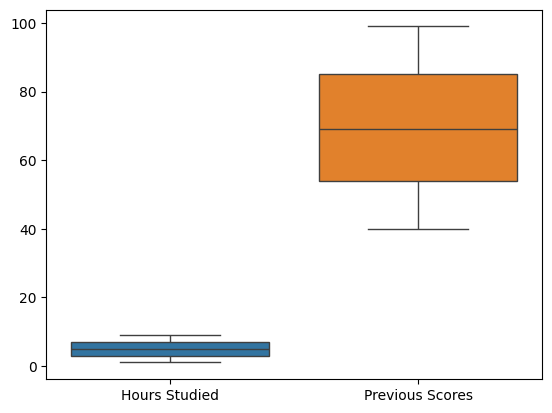

In [ ]:

sns.boxplot(data=x)

<Axes: >

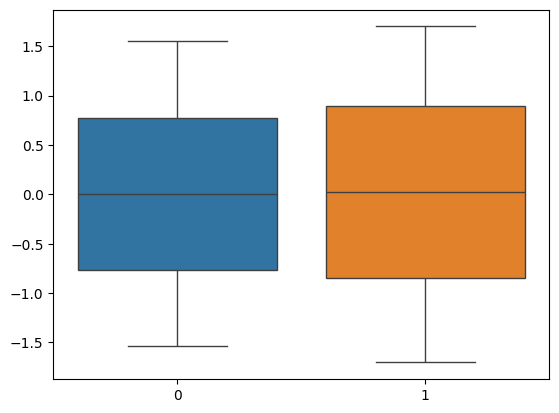

In [ ]:
sns.boxplot(data=xtrain)

In [ ]:
regression=LinearRegression()
regression.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
ypred=regression.predict(xtest)

In [ ]:
ypred

array([54.8191498 , 22.84514046, 47.30962885, ..., 16.74091117,
       63.34604229, 45.66280587])

In [ ]:
ytest

,Performance Index
6252,51
4684,20
1731,46
4742,28
4521,41
...,...
6412,45
8285,66
7853,16
1095,65


In [ ]:
residuals=ytest-ypred
print(residuals)

6252   -3.819150
4684   -2.845140
1731   -1.309629
4742   -2.208273
4521   -3.257514
          ...   
6412   -2.262058
8285    3.865289
7853   -0.740911
1095    1.653958
6929    1.337194
Name: Performance Index, Length: 2000, dtype: float64


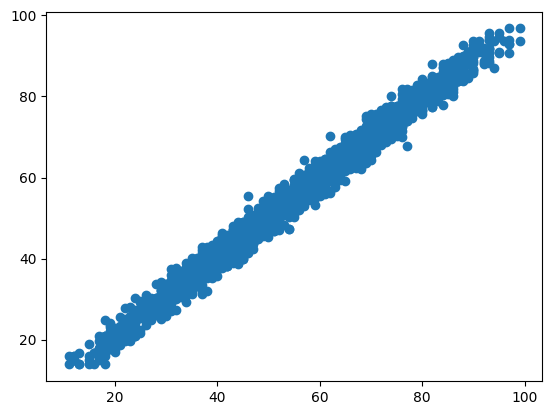

In [ ]:
plt.scatter(ytest,ypred)

In [ ]:
# Evaluation metrics
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)

print("MAE ",mae)
print("MSE ",mse)
print("RMSE ",rmse)

MAE  1.826902537629569
MSE  5.241921186551519
RMSE  2.289524227116088


In [ ]:
print(r2_score(ytest,ypred))

0.985855014245765
